In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

/home/boris/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [100]:
cols = ['dep','city','long','lat']
villes_raw_data = pd.read_csv('villes_france.csv',header=None,usecols=[1,3,19,20],index_col=False,names=cols,low_memory=False) #,dtype={'1':np.str})
#villes_raw_data.columns = cols + villes_raw_data.columns.tolist()[len(cols):]
villes_raw_data.loc[(villes_raw_data['dep'] == '2A') | (villes_raw_data['dep'] == '2B'),'dep'] = 20
#villes_raw_data[villes_raw_data['dep']==20]
print(villes_raw_data)

       dep                      city      long       lat
0       01                      OZAN   4.91667  46.38330
1       01     CORMORANCHE-SUR-SAONE   4.83333  46.23330
2       01                    PLAGNE   5.73333  46.18330
3       01                   TOSSIAT   5.31667  46.13330
4       01                  POUILLAT   5.43333  46.33330
5       01                   TORCIEU   5.40000  45.91670
6       01                 REPLONGES   4.88333  46.30000
7       01                 CORCELLES   5.58333  46.03330
8       01                     PERON   5.93333  46.20000
9       01                  RELEVANT   4.95000  46.08330
10      01                CHAVEYRIAT   5.06667  46.18330
11      01             VAUX-EN-BUGEY   5.35000  45.91670
12      01                   MAILLAT   5.55000  46.13330
13      01                  FARAMANS   5.11667  45.90000
14      01                      BEON   5.75000  45.83330
15      01             SAINT-BERNARD   4.73723  45.94500
16      01                 ROSS

In [122]:
villes_raw_data['dep'] = villes_raw_data['dep'].astype(int)
villes_data = villes_raw_data[villes_raw_data['dep']<96]
villes_data

,dep,city,long,lat
0,1,OZAN,4.91667,46.3833
1,1,CORMORANCHE-SUR-SAONE,4.83333,46.2333
2,1,PLAGNE,5.73333,46.1833
3,1,TOSSIAT,5.31667,46.1333
4,1,POUILLAT,5.43333,46.3333
5,1,TORCIEU,5.40000,45.9167
6,1,REPLONGES,4.88333,46.3000
7,1,CORCELLES,5.58333,46.0333
8,1,PERON,5.93333,46.2000
9,1,RELEVANT,4.95000,46.0833


In [102]:
long_min,long_max,lat_min,lat_max = min(villes_data['long']),max(villes_data['long']),min(villes_data['lat']),max(villes_data['lat'])

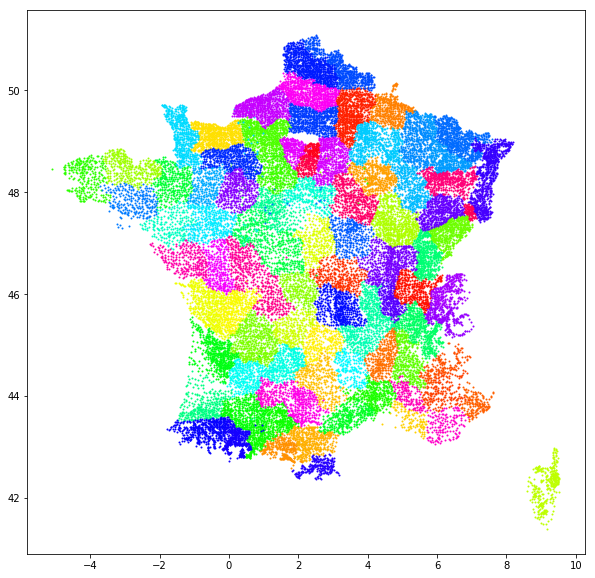

In [180]:
cmap = get_cmap(95)
for dep in range(1,95):
    villes_dep = villes_data[villes_data['dep']==dep]
    plt.plot(villes_dep['long'],villes_dep['lat'],'ro',markersize=1,c=cmap(dep))
plt.show()

In [104]:
num_samples = 5000
sample = np.random.randint(villes_data.shape[0],size=num_samples,dtype=np.int64)

In [123]:
Coord = villes_data[['long','lat']].values
dep = villes_data['dep'].values

In [124]:
Coord.shape,dep.shape

((36568, 2), (36568,))

In [125]:
X = Coord[sample]
y = dep[sample]

In [135]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,train_size=0.7)

In [130]:
knn = KNeighborsClassifier(3)
knn.fit(Xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [131]:
print(knn.predict(Xtrain[10:15]))
print(ytrain[10:15])

[62 63 32 82 46]
[62 63 32 82 19]


In [132]:
1-knn.score(Xtest,ytest)

0.09699999999999998

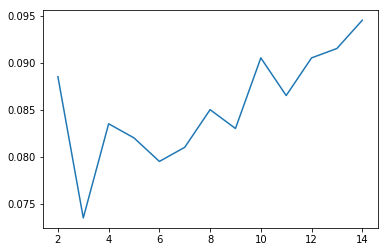

In [143]:
num_samples = 10000
sample = np.random.randint(villes_data.shape[0],size=num_samples,dtype=np.int64)
Coord = villes_data[['long','lat']].values
dep = villes_data['dep'].values
X = Coord[sample]
y = dep[sample]
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,train_size=0.8)
error = list()
for k in range(2,15):
    knn = KNeighborsClassifier(k)
    knn.fit(Xtrain,ytrain)
    error.append(1-knn.score(Xtest,ytest))
plt.plot(range(2,15),error)
plt.show()

In [152]:
knn.predict(villes_data[villes_data['city']=='BREST'][['long','lat']])

array([29])

In [167]:
villes_predict = knn.predict(villes_data[['long','lat']])
villes_predict = np.append(villes_data,villes_predict.reshape((villes_predict.shape[0],1)),1)
villes_predict = pd.DataFrame(villes_predict,columns=['dep','city','long','lat','prediction'])
villes_predict

,dep,city,long,lat,prediction
0,1,OZAN,4.91667,46.3833,1
1,1,CORMORANCHE-SUR-SAONE,4.83333,46.2333,1
2,1,PLAGNE,5.73333,46.1833,1
3,1,TOSSIAT,5.31667,46.1333,1
4,1,POUILLAT,5.43333,46.3333,39
5,1,TORCIEU,5.4,45.9167,1
6,1,REPLONGES,4.88333,46.3,1
7,1,CORCELLES,5.58333,46.0333,1
8,1,PERON,5.93333,46.2,1
9,1,RELEVANT,4.95,46.0833,1


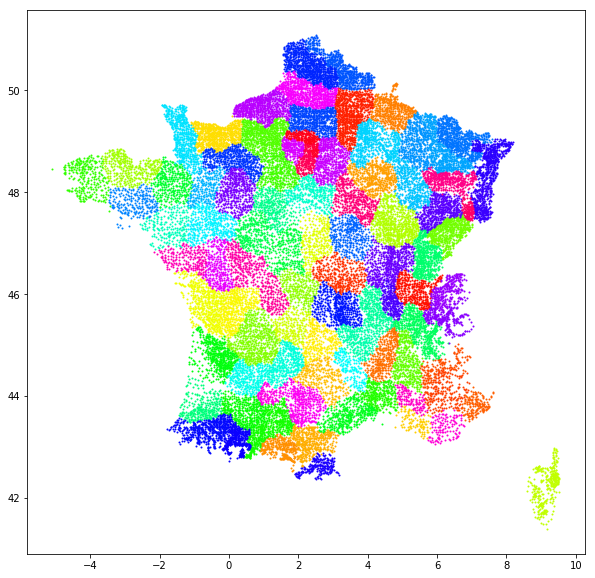

In [179]:
plt.rcParams["figure.figsize"] = [10.0,10.0]
cmap = get_cmap(96)
for dep in range(1,96):
    villes_dep = villes_predict[villes_predict['prediction']==dep]
    plt.plot(villes_dep['long'],villes_dep['lat'],'ro',markersize=1,c=cmap(dep))
plt.show()

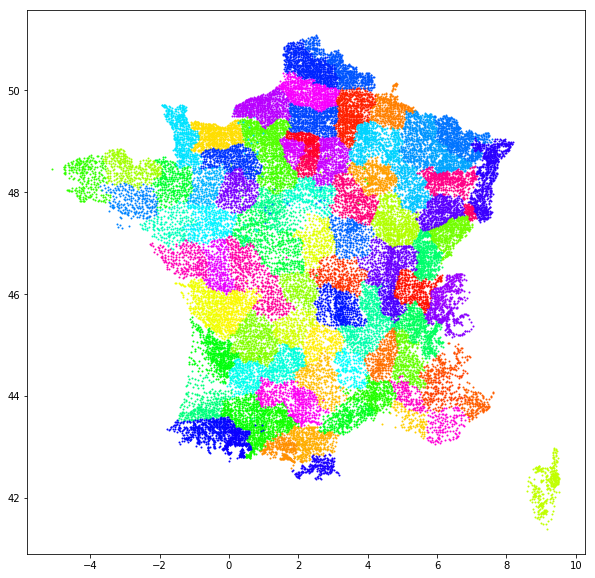

In [178]:
cmap = get_cmap(96)
for dep in range(1,96):
    villes_dep = villes_data[villes_data['dep']==dep]
    plt.plot(villes_dep['long'],villes_dep['lat'],'ro',markersize=1,c=cmap(dep))
plt.show()

In [177]:
villes_data[villes_data['dep']==95]

,dep,city,long,lat
36023,95,BAILLET-EN-FRANCE,2.30000,49.0667
36024,95,OSNY,2.06667,49.0667
36025,95,HODENT,1.76667,49.1500
36026,95,MONTREUIL-SUR-EPTE,1.68333,49.1833
36027,95,CERGY,2.06667,49.0333
36028,95,CHENNEVIERES-LES-LOUVRES,2.55000,49.0500
36029,95,MONTLIGNON,2.28333,49.0167
36030,95,FONTENAY-EN-PARISIS,2.45000,49.0500
36031,95,EZANVILLE,2.36667,49.0333
36032,95,NEUVILLE-SUR-OISE,2.06667,49.0167
